# 1. Load dataset

#### In this assignment, you will use a turbo.az dataset which is a collection of cars (Mercedes C-class). It contains information about 1328 cars with features of (Sheher, Marka, Model, Buraxilish ili, Ban novu, Reng, Muherrikin hecmi, Muherrikin gucu, Yanacaq novu, Yurush, Suretler qutusu, Oturucu, Yeni, Qiymet, Extra Information, Seller’s comment). You will need to read the data from data file (turboaz.csv) and extract only 3 columns for your model:
X1 - Yurush (mileage)<br>
X2 - Buraxilish ili (model year)<br>
Y - Qiymet (price)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
points = pd.read_csv("turboaz.csv")
points.info()

In [ ]:
x1 = points['Yurush'].apply(lambda x: int(x.rstrip('km').replace(' ', ''))) 
x2 = points['Buraxilish ili']
y = points['Qiymet'].apply(lambda x: float(x.rstrip('$'))*1.7 if '$' in x else float(x.rstrip('AZN')))

x1_saved = x1
x2_saved = x2
y_saved = y

# 2. Visualize

#### Using matplotlib library (scatter, Axes3D), you are expected to provide 3 visualizations of data:
a) Qiymet (Y) vs Yurush (X1)<br>
b) Qiymet (Y) vs Buraxilish ili (X2)<br>
c) 3D plot of all three values (Y, X1, X2)<br>

In [ ]:
plt.scatter(x1, y)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

plt.scatter(x2, y)
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y)
plt.show()

# 3. Linear Regresa a mi

#### Implement Linear Regression from scratch (using numpy)
a) Calculate cost function. Implement a function which returns cost given true y values, x values and parameters (w).<br>
<div>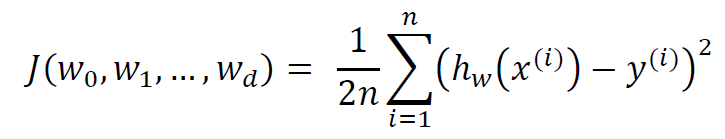</div>

In [ ]:
linear = lambda X, w: X.dot(w)
cost_function = lambda loss: np.sum(loss ** 2)/(2 * len(y))

In [ ]:
x0 = np.ones(len(x1))
X = np.array([x0, x1, x2]).T
w = np.array([0, 3, 1], np.float64)  

initial_cost = cost_function(linear(X, w) - y)
initial_cost

b) Normalize data using Z score normalization (Recommended).<br>

In [ ]:
x1 = (x1 - x1.mean())/x1.std()
x2 = (x2 - x2.mean())/x2.std()
y = (y - y.mean())/y.std()
X = np.array([x0, x1, x2]).T

c) Implement gradient descent algorithm to minimize the cost function.
- Assign initial values of W=(w0, w1, w2) to zero or choose randomly
- Learning rate: alpha=0.001, you can change it in different experiments
- Number of iterations: 10000 or you can stop it when two sequential values are too close.
- Calculate values of parameters using gradient descent formula.
<div>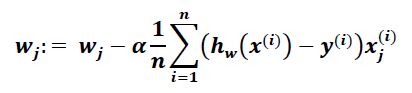</div>

In [ ]:
def gradient_descent(X, y, w, learning_rate, iterations):
    cost_log = []
    
    for iteration in range(iterations):
        
        h = X.dot(w)
        loss = h - y
        gradient = X.T.dot(loss) / len(y)
        w -= learning_rate * gradient
        cost = cost_function(loss)
        cost_log.append(cost)
        
        if (iteration % 1000 == 0) or (iteration == iterations - 1): 
            print(f"Iteration {iteration} | Cost {round(cost, 2)}")

    return w, cost_log

In [ ]:
learning_rate = 0.001
iterations = 10000
new_weights, cost_log = gradient_descent(X, y, w, learning_rate, iterations)

In [ ]:
new_weights

d) Plot graph of Cost function and describe how it changes over iterations.

In [ ]:
plt.plot(cost_log)
plt.xlabel('Iteration #')
plt.ylabel('Cost')
plt.title('Cost vs iteration')
plt.show()

e) Plot points of Y (Qiymet) vs X1 (Buraxilish ili) and draw a line of predictions made with parameters you got from gradient descent.

In [ ]:
plt.scatter(x2, y)
plt.xlabel('Production Year')
plt.ylabel('Price')
predictions_year = new_weights[0] * x0 + new_weights[2] * x2
plt.plot(x2, predictions_year, c='r')
plt.show()

f) Plot points of Y (Qiymet) vs X2 (Yurush) and draw a line of predictions made with parameters you got from gradient descent.

In [ ]:
plt.scatter(x1, y)
plt.xlabel('Mileage')
plt.ylabel('Price')

predictions_mileage = new_weights[0] * x0 + new_weights[1] * x1 
plt.plot(x1, predictions_mileage, c='r')
plt.show()

g) Plot 3D graph of points of Y (Qiymet), X1, X2 and predicted Y (Qiymet) using the same X1 and X2. It should look like this (blue points are true values, red points are predicted values):

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, color='b')
predictions_3d = new_weights[0] * x0 + new_weights[1] * x1 + new_weights[2] * x2
ax.scatter(x1, x2, predictions_3d, c='r')

plt.show()

h) Given are two new cars which are not in the dataset. Predict the prices of these cars by using your parameters and compare your predictions with the actual prices.
- Car 1 {Yurush: 240000, Buraxilish ili: 2000, Qiymet: 11500}
- Car 2 {Yurush: 415558, Buraxilish ili: 1996, Qiymet: 8800}

In [ ]:
def predict(X):
    x1, x2 = X
    x1 = (x1 - x1_saved.mean())/x1_saved.std()
    x2 = (x2 - x2_saved.mean())/x2_saved.std()
    prediction = new_weights[0] * 1 + new_weights[1] * x1 + new_weights[2] * x2
    return prediction * y_saved.std() + y_saved.mean()

In [ ]:
X_test = [[240000, 2000], [415558, 1996]]
y_test = [11500, 8800]

print(f"Car #1: Prediction: {round(predict(X_test[0]), 2)} | Actual: 11500")
print(f"Car #2: Prediction: {round(predict(X_test[1]), 2)} | Actual: 8800")

# 4. Linear Regression using library

#### Use a library to fit perform linear regression on the data. You should use the same features (Yurush and Buraxilish ili) as input to this model and perform the same testing (3(h)) as above (using scikit-learn library is recommended).

In [ ]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X[:, 1:], y)

In [ ]:
def predict_lr(X):
    x1, x2 = X
    x1 = (x1 - x1_saved.mean())/x1_saved.std()
    x2 = (x2 - x2_saved.mean())/x2_saved.std()
    prediction = regressor.predict(np.array([[x1, x2]]))
    return prediction[0] * y_saved.std() + y_saved.mean()

In [ ]:
print('Coefficients: \n', regressor.coef_)
print(f"Car #1: Prediction: {round(predict_lr(X_test[0]), 2)} | Actual: 11500")
print(f"Car #2: Prediction: {round(predict_lr(X_test[1]), 2)} | Actual: 8800")